In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Create a synthetic dataset
np.random.seed(42) # for reproducibility
num_patients = 1000
temperatures = np.random.normal(loc=37.0, scale=1.0, size=num_patients)

In [3]:
# Define a simple fever threshold (e.g., > 38°C)
labels = (temperatures > 38.0).astype(int)

In [4]:
# Add some noise to make the classification task more realistic
noise_indices = np.random.choice(num_patients, size=50, replace=False)
labels[noise_indices] = 1 - labels[noise_indices]

In [5]:
# Create a DataFrame
data = pd.DataFrame({'temperature': temperatures, 'fever_status': labels})

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['temperature']], data['fever_status'], test_size=0.2, random_state=42)

# Scale the temperature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


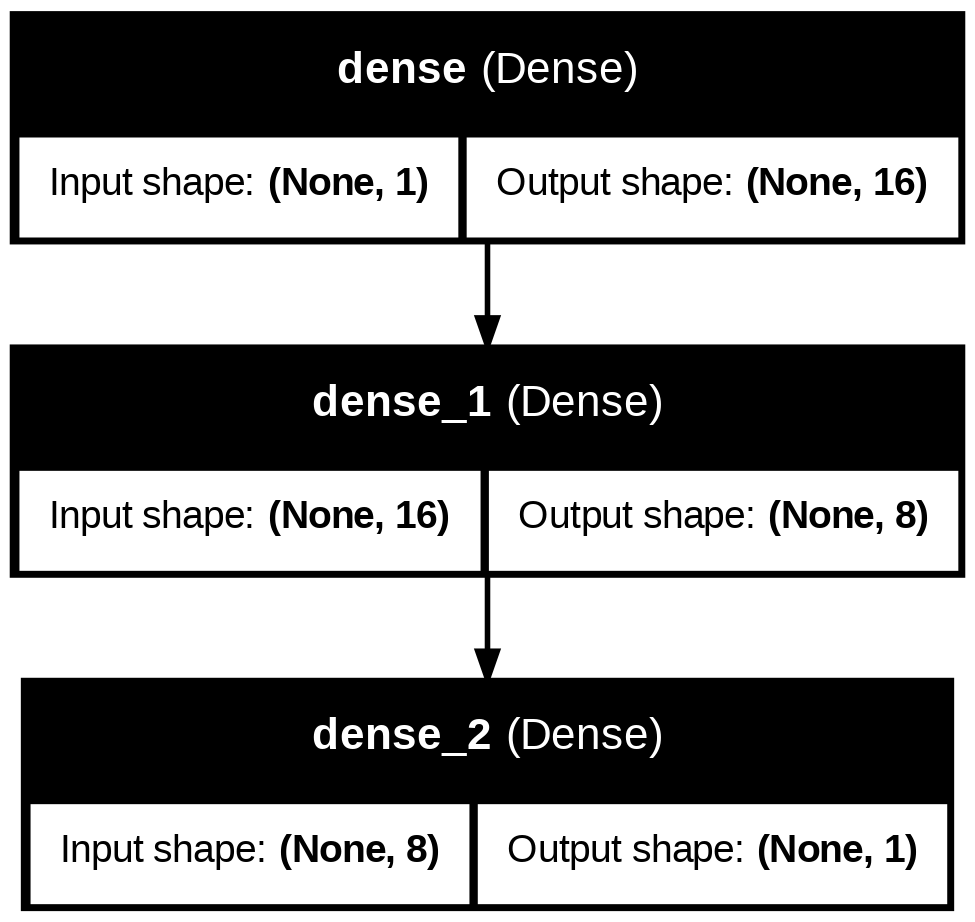

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8219 - loss: 0.6809 - val_accuracy: 0.8900 - val_loss: 0.6564
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8979 - loss: 0.6475 - val_accuracy: 0.9200 - val_loss: 0.6179
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9107 - loss: 0.6070 - val_accuracy: 0.9150 - val_loss: 0.5685
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9095 - loss: 0.5554 - val_accuracy: 0.9100 - val_loss: 0.5200
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9261 - loss: 0.4962 - val_accuracy: 0.9200 - val_loss: 0.4714
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9110 - loss: 0.4593 - val_accuracy: 0.9150 - val_loss: 0.4236
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9274 - loss: 0.3994 - val_accuracy: 0.9200 - val_loss: 0.3796
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9096 - loss: 0.3825 - val_accuracy: 0.9250 - va

In [11]:
# Example of making a prediction for a new patient
new_temperatures_c = np.array([36.5, 38.1, 39.0]).reshape(-1, 1)

# Scale the new data just as you did with the training data
new_temperatures_scaled = scaler.transform(new_temperatures_c)

# Make predictions
probabilities = model.predict(new_temperatures_scaled)
predictions = (probabilities > 0.5).astype(int)

print(f"Probabilities: {probabilities.flatten()}")
print(f"Predictions (0=not fever, 1=fever): {predictions.flatten()}")

# Interpretation:
# - For 36.5°C, the model should predict "not fever".
# - For 38.1°C, the model should predict "fever".
# - For 39.0°C, the model should predict "fever".

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Probabilities: [0.04159489 0.65636367 0.95969605]
Predictions (0=not fever, 1=fever): [0 1 1]


In [12]:
# Example of making a prediction for a new patient
new_temperatures_c = np.array([36.5, 37, 38]).reshape(-1, 1)

# Scale the new data just as you did with the training data
new_temperatures_scaled = scaler.transform(new_temperatures_c)

# Make predictions
probabilities = model.predict(new_temperatures_scaled)
predictions = (probabilities > 0.5).astype(int)

print(f"Probabilities: {probabilities.flatten()}")
print(f"Predictions (0=not fever, 1=fever): {predictions.flatten()}")

# Interpretation:
# - For 36.5°C, the model should predict "not fever".
# - For 38.1°C, the model should predict "fever".
# - For 39.0°C, the model should predict "fever".

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Probabilities: [0.04159489 0.03781968 0.4875495 ]
Predictions (0=not fever, 1=fever): [0 0 0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
